QUESTION 1 : Build a 3D multimodal Gaussian distribution with synthetic data that has
two bell shapes.

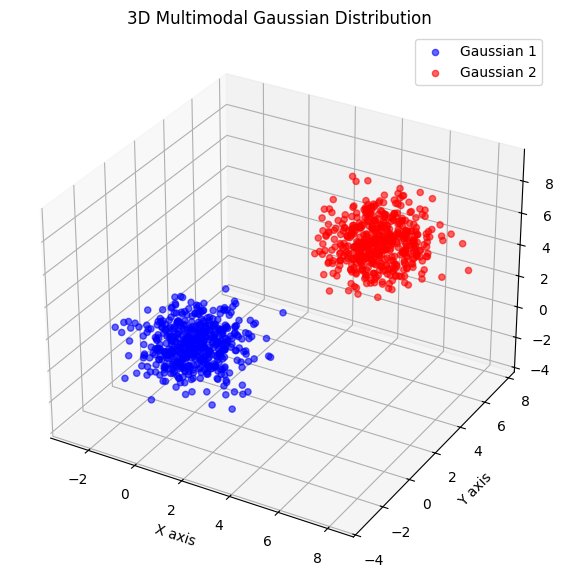

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mean1 = [0, 0, 0]
cov1 = [[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]

mean2 = [5, 5, 5]
cov2 = [[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]

data1 = np.random.multivariate_normal(mean1, cov1, 500)
data2 = np.random.multivariate_normal(mean2, cov2, 500)

data = np.concatenate((data1, data2))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1[:, 0], data1[:, 1], data1[:, 2], color='blue', alpha=0.6, label='Gaussian 1')
ax.scatter(data2[:, 0], data2[:, 1], data2[:, 2], color='red', alpha=0.6, label='Gaussian 2')

ax.set_title('3D Multimodal Gaussian Distribution')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()

plt.show()


QUESTION 2 : Construct a piecewise linear regression and plot the result with its splines
and knots.

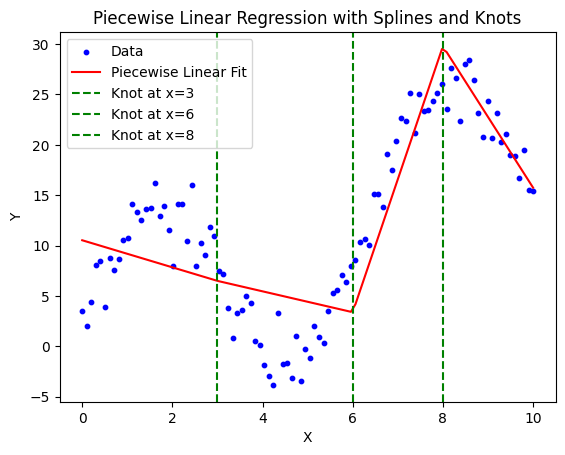

Execution Time: 0.02400064468383789 seconds
CPU times: total: 109 ms
Wall time: 173 ms


In [42]:
%%time
from scipy.interpolate import LSQUnivariateSpline

np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + np.sin(x) * 10 + np.random.normal(0, 2, size=x.shape)

knots = [3, 6, 8]

spl = LSQUnivariateSpline(x, y, knots, k=1)
plt.scatter(x, y, color='blue', label='Data', s=10)
plt.plot(x, spl(x), color='red', label='Piecewise Linear Fit')

for knot in knots:
    plt.axvline(x=knot, color='green', linestyle='--', label=f'Knot at x={knot}')
plt.title('Piecewise Linear Regression with Splines and Knots')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

import time
start_time = time.time()
for i in range(1000000):
    pass
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


Question 3 : Construct a piecewise polynomial regression and plot the result, its
splines, and knots.

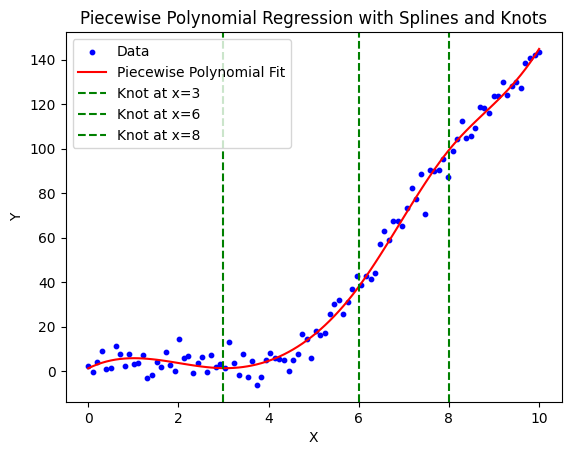

Execution Time: 0.025327205657958984 seconds
CPU times: total: 46.9 ms
Wall time: 172 ms


In [43]:
%%time
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x**2 - 5 * x + np.sin(x) * 10 + np.random.normal(0, 5, size=x.shape)

knots = [3, 6, 8]
spl = LSQUnivariateSpline(x, y, knots, k=3)
plt.scatter(x, y, color='blue', label='Data', s=10)
plt.plot(x, spl(x), color='red', label='Piecewise Polynomial Fit')

for knot in knots:
    plt.axvline(x=knot, color='green', linestyle='--', label=f'Knot at x={knot}')

plt.title('Piecewise Polynomial Regression with Splines and Knots')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
import time
start_time = time.time()
for i in range(1000000):
    pass
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


Question 4 : In addition to F-statistics you use to decide the number of knots, report
RSME and R^2 for all models. 

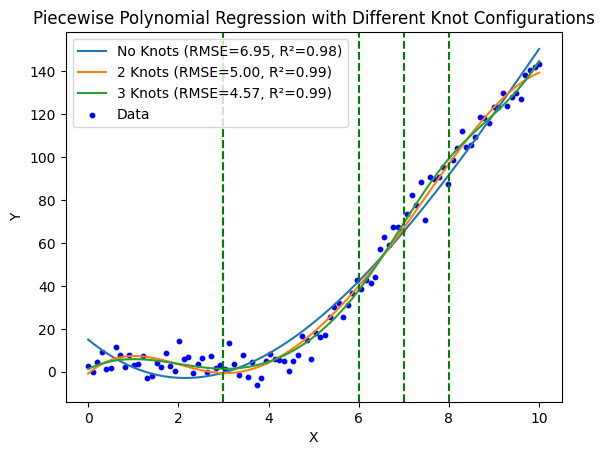

Model: No Knots
  RMSE: 6.9481
  R²: 0.9788

Model: 2 Knots
  RMSE: 4.9978
  R²: 0.9890

Model: 3 Knots
  RMSE: 4.5737
  R²: 0.9908



In [27]:
from sklearn.metrics import mean_squared_error, r2_score
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x**2 - 5 * x + np.sin(x) * 10 + np.random.normal(0, 5, size=x.shape)

knot_sets = {
    'No Knots': [],
    '2 Knots': [3, 7],
    '3 Knots': [3, 6, 8],
}
def evaluate_model(x, y, spl):
    y_pred = spl(x)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    return rmse, r2

results = []
for name, knots in knot_sets.items():
    if len(knots) > 0:
        spl = LSQUnivariateSpline(x, y, knots, k=3)
    else:
        spl = LSQUnivariateSpline(x, y, [], k=3)
    
    rmse, r2 = evaluate_model(x, y, spl)
    results.append((name, rmse, r2))

    plt.plot(x, spl(x), label=f'{name} (RMSE={rmse:.2f}, R²={r2:.2f})')

plt.scatter(x, y, color='blue', label='Data', s=10)

for name, knots in knot_sets.items():
    for knot in knots:
        plt.axvline(x=knot, color='green', linestyle='--')

plt.title('Piecewise Polynomial Regression with Different Knot Configurations')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

for name, rmse, r2 in results:
    print(f"Model: {name}\n  RMSE: {rmse:.4f}\n  R²: {r2:.4f}\n")


Question 5: Try to model the multimodal Gaussian distribution built with single
polynomial regression.


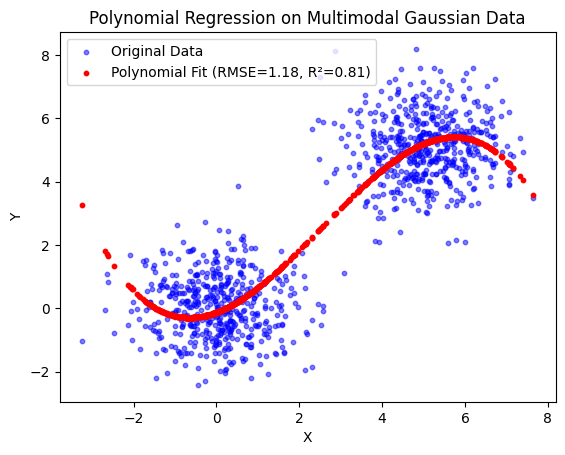

RMSE: 1.1827
R²: 0.8107
Execution Time: 0.029498815536499023 seconds
CPU times: total: 93.8 ms
Wall time: 200 ms


In [44]:
%%time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
np.random.seed(42)
mean1 = [0, 0]
mean2 = [5, 5]
cov = [[1, 0], [0, 1]]

data1 = np.random.multivariate_normal(mean1, cov, 500)
data2 = np.random.multivariate_normal(mean2, cov, 500)

data = np.concatenate((data1, data2))

X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

y_pred = model.predict(X_poly)

rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

plt.scatter(X, y, color='blue', label='Original Data', s=10, alpha=0.5)

plt.scatter(X, y_pred, color='red', label=f'Polynomial Fit (RMSE={rmse:.2f}, R²={r2:.2f})', s=10)

plt.title('Polynomial Regression on Multimodal Gaussian Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
import time
start_time = time.time()
for i in range(1000000):
    pass
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution Time: {execution_time} seconds")


Question 7: Use the Multimodal Gaussian distribution of Tasks 5, apply Ridge,
LASSO, and compare their accuracy and number of parameters,
parameters coefficient with Polynomial regression. Here you should also
report and discuss the differences (if there are any differences)

Polynomial Regression:
  RMSE: 1.1827
  R²: 0.8107
  Number of Parameters: 3
  Coefficients: [ 0.          0.49350147  0.33266361 -0.04365371]

Ridge Regression:
  RMSE: 1.1827
  R²: 0.8107
  Number of Parameters: 3
  Coefficients: [ 0.          0.49294846  0.33279368 -0.04365946]

LASSO Regression:
  RMSE: 1.1861
  R²: 0.8096
  Number of Parameters: 3
  Coefficients: [ 0.          0.4001949   0.34626059 -0.04328653]



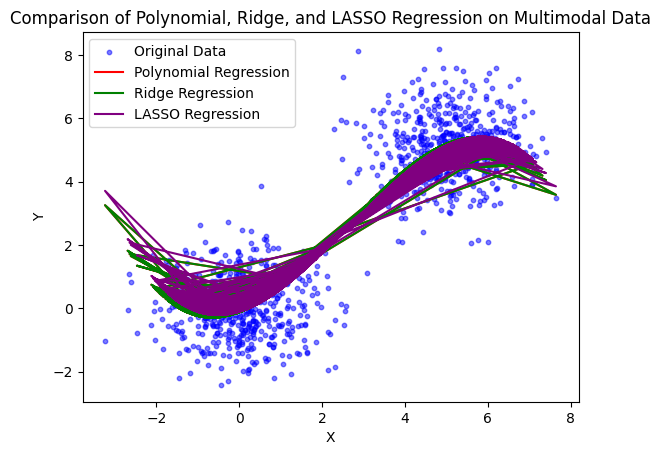

In [31]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)
mean1 = [0, 0]
mean2 = [5, 5]
cov = [[1, 0], [0, 1]]

data1 = np.random.multivariate_normal(mean1, cov, 500)
data2 = np.random.multivariate_normal(mean2, cov, 500)

data = np.concatenate((data1, data2))

X = data[:, 0].reshape(-1, 1)
y = data[:, 1]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

models = {
    'Polynomial Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'LASSO Regression': Lasso(alpha=0.1)
}

def evaluate_model(name, model, X_poly, y):
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    r2 = r2_score(y, y_pred)
    print(f"{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²: {r2:.4f}")
    print(f"  Number of Parameters: {np.sum(model.coef_ != 0)}")
    print(f"  Coefficients: {model.coef_}\n")
    return y_pred

plt.scatter(X, y, color='blue', label='Original Data', s=10, alpha=0.5)

colors = ['red', 'green', 'purple']
for i, (name, model) in enumerate(models.items()):
    y_pred = evaluate_model(name, model, X_poly, y)
    plt.plot(X, y_pred, color=colors[i], label=f'{name}')

plt.title('Comparison of Polynomial, Ridge, and LASSO Regression on Multimodal Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
